## Day 32 Lecture 2 Assignment

In this assignment, we will learn about SVM. We will use the csection dataset loaded below and analyze the model generated for this dataset.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

sns.set()

In [0]:
# Age -  ranges from 18 to 40  
# Delivery number - ranges from 1 to 4
# Delivery time -  {0 = timely , 1 = premature , 2 = latecomer}
# Blood of Pressure - {0 = low , 1 = normal , 2 = high }
# Heart Problem - {0 = apt, 1 = inept }

# Target - Caesarian - {0 = No, 1 = Yes }

csection = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/csection.csv')

Our goal is to predict the patient needed a csection.

In [0]:
csection.head()

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


Check whether the data has missing values and remove all rows containing missing values.

In [0]:
# answer below:

csection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
Age                80 non-null int64
Delivery number    80 non-null int64
Delivery time      80 non-null int64
Blood Pressure     80 non-null int64
Heart Problem      80 non-null int64
Caesarian          80 non-null int64
dtypes: int64(6)
memory usage: 3.9 KB


In [0]:
for col in csection.columns:
  print(col, csection[col].value_counts())

Age 26    10
32     8
27     7
25     7
29     6
28     6
33     5
22     4
31     3
36     3
20     3
30     3
21     2
35     2
19     2
18     2
24     2
40     1
23     1
38     1
37     1
17     1
Name: Age, dtype: int64
Delivery number 1    41
2    27
3    10
4     2
Name: Delivery number, dtype: int64
Delivery time 0    46
2    17
1    17
Name: Delivery time, dtype: int64
Blood Pressure 1    40
2    20
0    20
Name: Blood Pressure, dtype: int64
Heart Problem 0    50
1    30
Name: Heart Problem, dtype: int64
Caesarian 1    46
0    34
Name: Caesarian, dtype: int64


Examine the distribution of delivery number, blood pressure and heart problem.

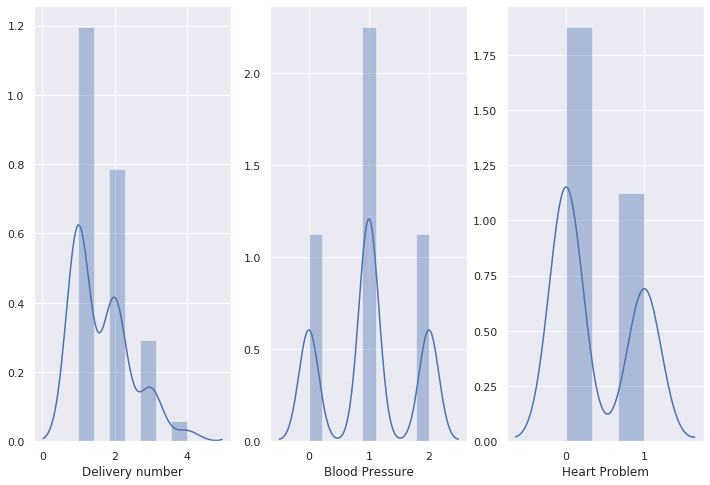

In [0]:
# answer below:
plt.figure(figsize=(12,8))
plt.subplot(1, 3, 1)
sns.distplot(csection['Delivery number'])
plt.subplot(1, 3, 2)
sns.distplot(csection['Blood Pressure'])
plt.subplot(1, 3, 3)
sns.distplot(csection['Heart Problem'])
plt.show()

What are your conclusions from the distribtuions of these variables? Write them below.

In [0]:
# answer below:

# Heart problems is binary, the other two columns are categorical

Create dummy variables from all columns containing categorical variables with more than two values.

In [0]:
# answer below:
dummy_cols = ['Age', 'Delivery number', 'Heart Problem']
dummies = pd.DataFrame()
dummies = pd.get_dummies(csection, columns=dummy_cols, drop_first=True)
dummies

,Delivery time,Blood Pressure,Caesarian,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27,Age_28,Age_29,Age_30,Age_31,Age_32,Age_33,Age_35,Age_36,Age_37,Age_38,Age_40,Delivery number_2,Delivery number_3,Delivery number_4,Heart Problem_1
0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
76,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
77,1,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
78,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
dummies.columns

Index(['Delivery time', 'Blood Pressure', 'Caesarian', 'Age_18', 'Age_19',
       'Age_20', 'Age_21', 'Age_22', 'Age_23', 'Age_24', 'Age_25', 'Age_26',
       'Age_27', 'Age_28', 'Age_29', 'Age_30', 'Age_31', 'Age_32', 'Age_33',
       'Age_35', 'Age_36', 'Age_37', 'Age_38', 'Age_40', 'Delivery number_2',
       'Delivery number_3', 'Delivery number_4', 'Heart Problem_1'],
      dtype='object')

Split the data into test and train with test containing 20% of the data.

In [0]:
# answer below:

X = dummies.drop(columns='Caesarian')
y = dummies['Caesarian']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=200)

Use the linear kernel to train a SVC model on our training data. Report the score for the test data.

In [0]:
# answer below:

svm = SVC(kernel='linear', C=3)
svm.fit(X, y)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
svm.score(X_train, y_train)

0.734375

In [0]:
svm.score(X_test, y_test)

0.75